In [41]:
import tensorflow as tf

tf.test.is_gpu_available("GPU")

False

## EarlyStopping - Regression

In [ ]:
from tensorflow.keras.datasets import boston_housing

In [ ]:
help(boston_housing.load_data)

Help on function load_data in module keras.datasets.boston_housing:

load_data(path='boston_housing.npz', test_split=0.2, seed=113)
    Loads the Boston Housing dataset.
    
    This is a dataset taken from the StatLib library which is maintained at
    Carnegie Mellon University.
    
    Samples contain 13 attributes of houses at different locations around the
    Boston suburbs in the late 1970s. Targets are the median values of
    the houses at a location (in k$).
    
    The attributes themselves are defined in the
    [StatLib website](http://lib.stat.cmu.edu/datasets/boston).
    
    Args:
      path: path where to cache the dataset locally
          (relative to `~/.keras/datasets`).
      test_split: fraction of the data to reserve as test set.
      seed: Random seed for shuffling the data
          before computing the test split.
    
    Returns:
      Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train, x_test**: numpy arrays with shape `

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
# 정규화
X_train_mean, X_train_std = X_train.mean(axis=0), X_train.std(axis=0)
X_test_mean, X_test_std = X_test.mean(axis=0), X_test.std(axis=0)

X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_test_mean) / X_test_std

In [ ]:
from sklearn import preprocessing

dir(preprocessing)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],) ))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                896       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# 학습
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)
# model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0) - 부담주지 않는
# model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=1)

Epoch 1/100
404/404 - 1s - loss: 22.4111 - mae: 3.2921 - 696ms/epoch - 2ms/step
Epoch 2/100
404/404 - 0s - loss: 17.5542 - mae: 2.8647 - 316ms/epoch - 783us/step
Epoch 3/100
404/404 - 0s - loss: 14.8792 - mae: 2.5730 - 338ms/epoch - 836us/step
Epoch 4/100
404/404 - 0s - loss: 12.5722 - mae: 2.4855 - 330ms/epoch - 816us/step
Epoch 5/100
404/404 - 0s - loss: 11.7678 - mae: 2.3583 - 308ms/epoch - 761us/step
Epoch 6/100
404/404 - 0s - loss: 11.8178 - mae: 2.3424 - 351ms/epoch - 868us/step
Epoch 7/100
404/404 - 0s - loss: 10.9842 - mae: 2.2275 - 318ms/epoch - 788us/step
Epoch 8/100
404/404 - 0s - loss: 10.7564 - mae: 2.2811 - 341ms/epoch - 845us/step
Epoch 9/100
404/404 - 0s - loss: 10.2625 - mae: 2.2033 - 326ms/epoch - 806us/step
Epoch 10/100
404/404 - 0s - loss: 10.1227 - mae: 2.2346 - 312ms/epoch - 772us/step
Epoch 11/100
404/404 - 0s - loss: 10.0760 - mae: 2.1568 - 318ms/epoch - 788us/step
Epoch 12/100
404/404 - 0s - loss: 9.7392 - mae: 2.1233 - 319ms/epoch - 789us/step
Epoch 13/100
404

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0) # 출력결과 epoch 안보이게

In [ ]:
model.evaluate(X_test, y_test, verbose=1) # 성능테스트

4/4 [==============================] - 0s 2ms/step - loss: 13.5619 - mae: 2.6413


[13.561857223510742, 2.6412830352783203]

In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
loss, mae

(14.350069046020508, 2.6434926986694336)

## K-Fold Validation

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],) ))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(1))

  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

  return model

model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                896       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

K = 5
EPOCHS = 100
BATCH_SIZE = 1

num_val_sample = len(X_train) // K
# all_scores = list()
history = dict(
    val_mse = list(),
    val_mae = list()
)

for i in range(K):
  print("Fold num: ", i)
  start_idx = num_val_sample * i
  end_idx = start_idx + num_val_sample # (num_val_sample * (i + 1))

  X_valid = X_train[start_idx: end_idx]
  y_valid = y_train[start_idx: end_idx]

  partial_X_train = np.concatenate([
      X_train[:start_idx],
      X_train[end_idx:]
  ], axis=0)
  partial_y_train = np.concatenate([
      y_train[:start_idx],
      y_train[end_idx:]
  ], axis=0)

  model = build_model()

  model.fit(
      partial_X_train,
      partial_y_train,
      epochs=EPOCHS,
      batch_size=BATCH_SIZE,
      verbose = 0
  )

  val_mse, val_mae = model.evaluate(X_valid, y_valid, verbose=0)
  history["val_mae"].append(val_mae)
  history["val_mse"].append(val_mse)

history



Fold num:  0
Fold num:  1


Fold num:  2


Fold num:  3
Fold num:  4


{'val_mse': [8.973634719848633,
  14.056135177612305,
  9.81274127960205,
  18.065881729125977,
  10.123954772949219],
 'val_mae': [1.8845326900482178,
  2.6303248405456543,
  2.3667571544647217,
  2.48832368850708,
  2.2086234092712402]}

In [ ]:
import numpy as np
np.__version__

'1.21.6'

In [ ]:
# 지수 평균 이동(EMA)
def smooth_curve(points, factor=0.9):
  smoothed_points = [points[0]]

  for point in points[1:]:
    tmp = smoothed_points[-1] * factor + point * (1 - factor)
    smoothed_points.append(tmp)
    
  return smoothed_points

In [ ]:
2+3*4

14

In [ ]:
sample_arr = np.array([3, 3, 4, 5, 5, 2, 4, 3, 6, 5])

smooth_curve(sample_arr)

[3,
 3.0,
 3.1,
 3.29,
 3.4610000000000003,
 3.3149000000000006,
 3.3834100000000005,
 3.3450690000000005,
 3.6105621,
 3.74950589]

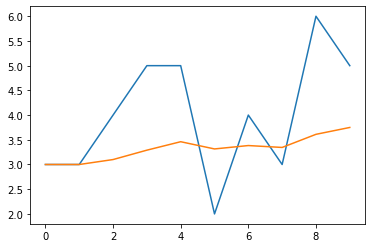

In [ ]:
import matplotlib.pyplot as plt

l = len(sample_arr)
plt.plot(range(l), sample_arr)
plt.plot(range(l), smooth_curve(sample_arr))

plt.show()

In [43]:
import numpy as np

K = 5
EPOCHS = 100
BATCH_SIZE = 2

num_val_sample = len(X_train) // K
# all_scores = list()
history = dict(
    val_mse = list(),
    val_mae = list()
)

for i in range(K):
  print("Fold num: ", i)
  start_idx = num_val_sample * i
  end_idx = start_idx + num_val_sample # (num_val_sample * (i + 1))

  X_valid = X_train[start_idx: end_idx]
  y_valid = y_train[start_idx: end_idx]

  partial_X_train = np.concatenate([
      X_train[:start_idx],
      X_train[end_idx:]
  ], axis=0)
  partial_y_train = np.concatenate([
      y_train[:start_idx],
      y_train[end_idx:]
  ], axis=0)

  model = build_model()

  _history = model.fit(
      partial_X_train,
      partial_y_train,
      validation_data = (X_valid, y_valid),
      epochs=EPOCHS,
      batch_size=BATCH_SIZE,
      verbose = 0
  )

  history["val_mae"].append(_history.history["val_mae"])
  history["val_mse"].append(_history.history["val_loss"])

history


Fold num:  0
Fold num:  1
Fold num:  2
Fold num:  3
Fold num:  4


{'val_mse': [[31.553295135498047,
   22.918514251708984,
   19.60086441040039,
   16.736370086669922,
   14.615376472473145,
   13.65295124053955,
   13.57124137878418,
   12.264429092407227,
   14.666577339172363,
   10.866043090820312,
   10.303299903869629,
   10.446992874145508,
   10.254995346069336,
   9.735891342163086,
   10.723196029663086,
   10.521550178527832,
   9.804632186889648,
   9.379960060119629,
   9.493282318115234,
   10.48404598236084,
   9.341769218444824,
   10.35536003112793,
   9.113635063171387,
   9.79005241394043,
   8.424200057983398,
   8.290311813354492,
   8.037221908569336,
   7.967440128326416,
   10.693525314331055,
   8.166718482971191,
   8.016240119934082,
   7.791191101074219,
   8.654027938842773,
   8.152641296386719,
   9.388375282287598,
   9.791003227233887,
   7.857189178466797,
   7.726622581481934,
   9.391520500183105,
   8.9771089553833,
   7.839703559875488,
   7.664865970611572,
   7.97896671295166,
   7.781370639801025,
   10.850654

In [52]:
len(history["val_mae"]), len(history["val_mae"][0])

(5, 100)

In [53]:
val_mae = np.array(history["val_mae"])
val_mae.shape

(5, 100)

In [62]:
history_avg = np.mean(val_mae, axis=0)
history_avg.shape

(100,)

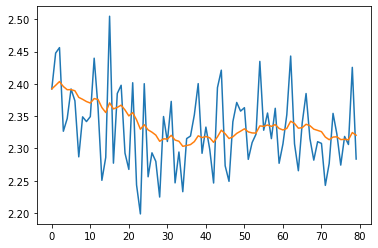

In [64]:
if len(history_avg) > 10:
  history_avg = history_avg[10:]

length = len(history_avg)
plt.plot(range(length), history_avg)
plt.plot(range(length), smooth_curve(history_avg))

plt.show()

In [67]:
model = build_model()
model.fit(X_train, y_train, epochs=80, batch_size=2, verbose = 2)

Epoch 1/80
202/202 - 22s - loss: 224.5664 - mae: 11.6125 - 22s/epoch - 109ms/step
Epoch 2/80
202/202 - 0s - loss: 31.5562 - mae: 3.9400 - 187ms/epoch - 924us/step
Epoch 3/80
202/202 - 0s - loss: 21.4191 - mae: 3.1605 - 178ms/epoch - 881us/step
Epoch 4/80
202/202 - 0s - loss: 17.3896 - mae: 2.8676 - 173ms/epoch - 856us/step
Epoch 5/80
202/202 - 0s - loss: 14.7907 - mae: 2.6757 - 168ms/epoch - 834us/step
Epoch 6/80
202/202 - 0s - loss: 13.0068 - mae: 2.4859 - 169ms/epoch - 838us/step
Epoch 7/80
202/202 - 0s - loss: 12.6175 - mae: 2.4441 - 170ms/epoch - 844us/step
Epoch 8/80
202/202 - 0s - loss: 12.0214 - mae: 2.3628 - 182ms/epoch - 900us/step
Epoch 9/80
202/202 - 0s - loss: 11.2074 - mae: 2.3432 - 172ms/epoch - 853us/step
Epoch 10/80
202/202 - 0s - loss: 10.6135 - mae: 2.2352 - 174ms/epoch - 861us/step
Epoch 11/80
202/202 - 0s - loss: 10.4734 - mae: 2.2226 - 176ms/epoch - 873us/step
Epoch 12/80
202/202 - 0s - loss: 10.4264 - mae: 2.1459 - 172ms/epoch - 853us/step
Epoch 13/80
202/202 - 0s

In [68]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 14.0191 - mae: 2.6455


[14.019104957580566, 2.6455187797546387]

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

K = 4
EPOCHS = 2000
BATCH_SIZE = 2
PATIENCE = 100 # 인내성?

early_stopping = EarlyStopping(
    monitor="val_mae",
    mode="min", # min, max mode 등
    patience=PATIENCE,
    verbose=1
)

num_val_sample = len(X_train) // K
history = dict(
    val_mse = list(),
    val_mae = list()
)

i = 2

start_idx = num_val_sample * i
end_idx = start_idx + num_val_sample # (num_val_sample * (i + 1))

X_valid = X_train[start_idx: end_idx]
y_valid = y_train[start_idx: end_idx]

partial_X_train = np.concatenate([
    X_train[:start_idx],
    X_train[end_idx:]
], axis=0)

partial_y_train = np.concatenate([
    y_train[:start_idx],
    y_train[end_idx:]
], axis=0)

model = build_model()

_history = model.fit(
    partial_X_train,
    partial_y_train,
    validation_data = (X_valid, y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping],
    verbose = 1
)



Epoch 1/2000
152/152 [==============================] - 1s 2ms/step - loss: 263.1010 - mae: 12.7500 - val_loss: 42.5724 - val_mae: 4.7318
Epoch 2/2000
152/152 [==============================] - 0s 1ms/step - loss: 36.9468 - mae: 4.0807 - val_loss: 22.5120 - val_mae: 3.1472
Epoch 3/2000
152/152 [==============================] - 0s 2ms/step - loss: 22.2674 - mae: 3.2079 - val_loss: 19.3724 - val_mae: 2.8481
Epoch 4/2000
152/152 [==============================] - 0s 1ms/step - loss: 17.0667 - mae: 2.8259 - val_loss: 16.7918 - val_mae: 2.6257
Epoch 5/2000
152/152 [==============================] - 0s 2ms/step - loss: 14.0716 - mae: 2.6388 - val_loss: 15.2853 - val_mae: 2.5074
Epoch 6/2000
152/152 [==============================] - 0s 2ms/step - loss: 12.3314 - mae: 2.5600 - val_loss: 16.4085 - val_mae: 2.5937
Epoch 7/2000
152/152 [==============================] - 0s 1ms/step - loss: 11.3809 - mae: 2.4063 - val_loss: 16.0440 - val_mae: 2.8501
Epoch 8/2000
152/152 [========================

In [76]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 19.2975 - mae: 2.8579


[19.297500610351562, 2.8579185009002686]

In [81]:
from tensorflow.keras.layers import BatchNormalization, Dropout, ReLU
from tensorflow.keras import regularizers

def build_model():
  model = Sequential()
  model.add(Dense(
      64,
      input_shape = (X_train.shape[1], ),
      kernel_initializer="he_uniform", # Xaiver - Glorot
      kernel_regularizer = regularizers.l2(0.001)

  ))
  model.add(BatchNormalization())
  model.add(ReLU())

  model.add(Dropout(0.5))
  model.add(Dense(64, activation="relu", kernel_regularizer = regularizers.l1(0.001), ))
  # model.add(Dropout(0.5))
  model.add(Dense(1))

  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [86]:
model = build_model()
model.fit(X_train, y_train, epochs=100, batch_size=2, verbose = 2)

Epoch 1/100
202/202 - 1s - loss: 312.6283 - mae: 14.4820 - 944ms/epoch - 5ms/step
Epoch 2/100
202/202 - 0s - loss: 112.4213 - mae: 7.8523 - 201ms/epoch - 994us/step
Epoch 3/100
202/202 - 0s - loss: 80.6180 - mae: 6.6349 - 213ms/epoch - 1ms/step
Epoch 4/100
202/202 - 0s - loss: 63.2958 - mae: 5.8621 - 233ms/epoch - 1ms/step
Epoch 5/100
202/202 - 0s - loss: 61.4359 - mae: 5.8382 - 203ms/epoch - 1ms/step
Epoch 6/100
202/202 - 0s - loss: 56.8499 - mae: 5.4847 - 204ms/epoch - 1ms/step
Epoch 7/100
202/202 - 0s - loss: 65.6037 - mae: 5.6364 - 235ms/epoch - 1ms/step
Epoch 8/100
202/202 - 0s - loss: 65.1821 - mae: 5.6940 - 211ms/epoch - 1ms/step
Epoch 9/100
202/202 - 0s - loss: 53.9600 - mae: 5.2083 - 207ms/epoch - 1ms/step
Epoch 10/100
202/202 - 0s - loss: 53.4345 - mae: 5.2356 - 206ms/epoch - 1ms/step
Epoch 11/100
202/202 - 0s - loss: 54.4253 - mae: 5.2195 - 208ms/epoch - 1ms/step
Epoch 12/100
202/202 - 0s - loss: 57.9036 - mae: 5.2925 - 205ms/epoch - 1ms/step
Epoch 13/100
202/202 - 0s - loss